# **Лабораторная работа №1**

Определить число кластеров.
Подобрать метод классификации, дающий наиболее ясные результаты.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [76]:
data = pd.read_csv('/content/drive/MyDrive/Анализ данных Python/ЛР №1 (леденцы)/Леденцы.dat', delimiter=';')
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
5,5,4,5,5,3,3,3,3,3,3,3
6,5,5,4,5,3,3,3,3,3,3,3
7,5,4,5,5,3,3,3,3,3,3,3
8,5,5,5,5,3,3,3,3,3,3,3
9,5,4,5,4,3,3,3,3,3,3,3


In [77]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [79]:
# Получим историю объединения объектов в кластеры
link = linkage(data, method='ward', metric='euclidean')
link[:20]

array([[  0.,   4.,   0.,   2.],
       [  1.,   3.,   0.,   2.],
       [  2.,   6.,   0.,   2.],
       [  5., 339.,   0.,   3.],
       [ 32., 338.,   0.,   3.],
       [  7., 341.,   0.,   4.],
       [  8.,  30.,   0.,   2.],
       [ 12.,  15.,   0.,   2.],
       [ 16., 345.,   0.,   3.],
       [ 17., 346.,   0.,   4.],
       [ 18., 347.,   0.,   5.],
       [ 19., 348.,   0.,   6.],
       [ 20., 349.,   0.,   7.],
       [ 21., 350.,   0.,   8.],
       [ 23., 351.,   0.,   9.],
       [ 24., 352.,   0.,  10.],
       [ 25., 353.,   0.,  11.],
       [ 26., 354.,   0.,  12.],
       [ 42.,  43.,   0.,   2.],
       [ 44., 356.,   0.,   3.]])

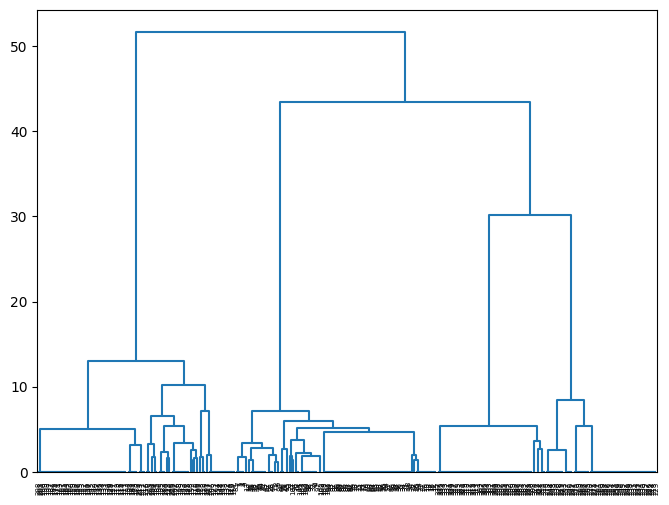

In [80]:
fig = plt.figure(figsize=(8,6))
dend = dendrogram(link, color_threshold=-1, labels=data.index.tolist())

In [81]:
# получим массив только с расстояниями для построения "каменистой осыпи"
distances = link[:,2]
distances

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Text(0, 0.5, 'Расстояние')

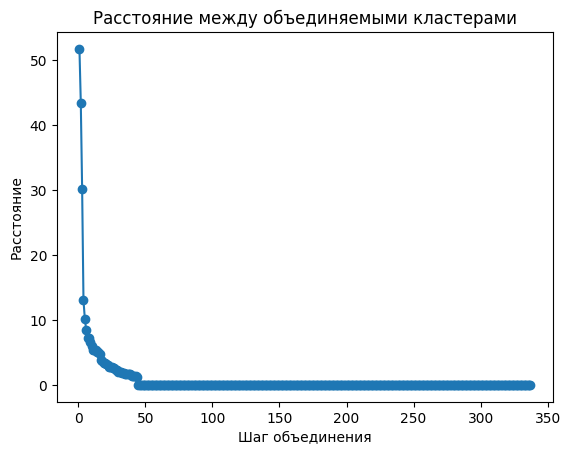

In [82]:
# "каменистая осыпь"
dist_rev = distances[::-1]
idxs = range(1, len(distances) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Text(0, 0.5, 'Расстояние')

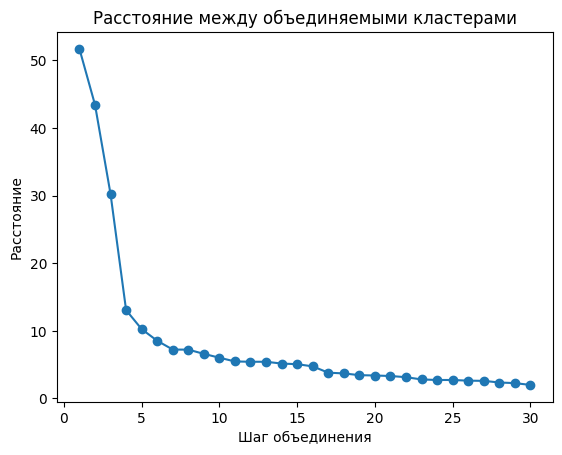

In [83]:
# На первоначальном графике не ясно, на каком этапе расстояние пеерестает резко изменяться
# Уменьшим кол-во рассматриваемых итераций до 30
dist_rev = distances[::-1]
idxs = range(1, 30 + 1)
plt.plot(idxs, dist_rev[:len(idxs)], marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Text(0, 0.5, 'Расстояние')

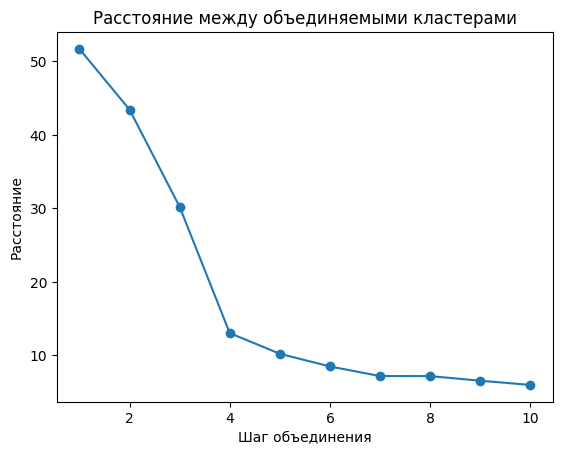

In [84]:
# Промасштабируем график "каменистой осыпи" для наглядности
dist_rev = distances[::-1]
idxs = range(1, 10 + 1)
plt.plot(idxs, dist_rev[:len(idxs)], marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

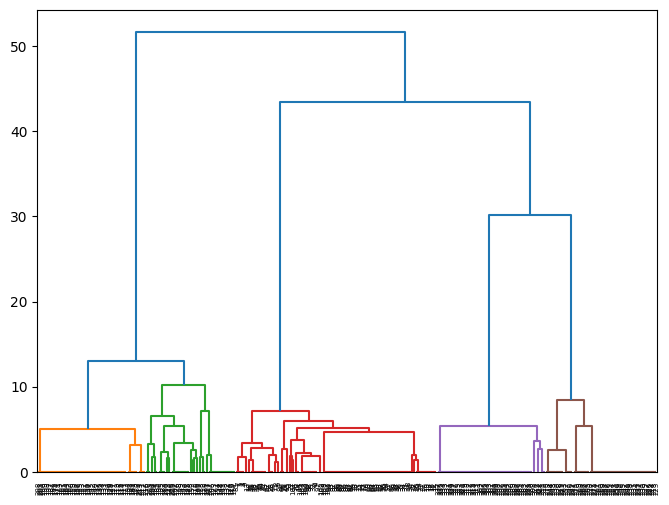

In [85]:
# Таким образом, на 4 шаге расстояние между кластерами перестает сильно изменяться
# Принимаем число кластеров равным 4 (и смотрим, насколько хорошо выделяются кластеры из набора данных)
fig = plt.figure(figsize=(8,6))
dend_v2 = dendrogram(link,
                     color_threshold=dist_rev[3],
                     labels=data.index.tolist())

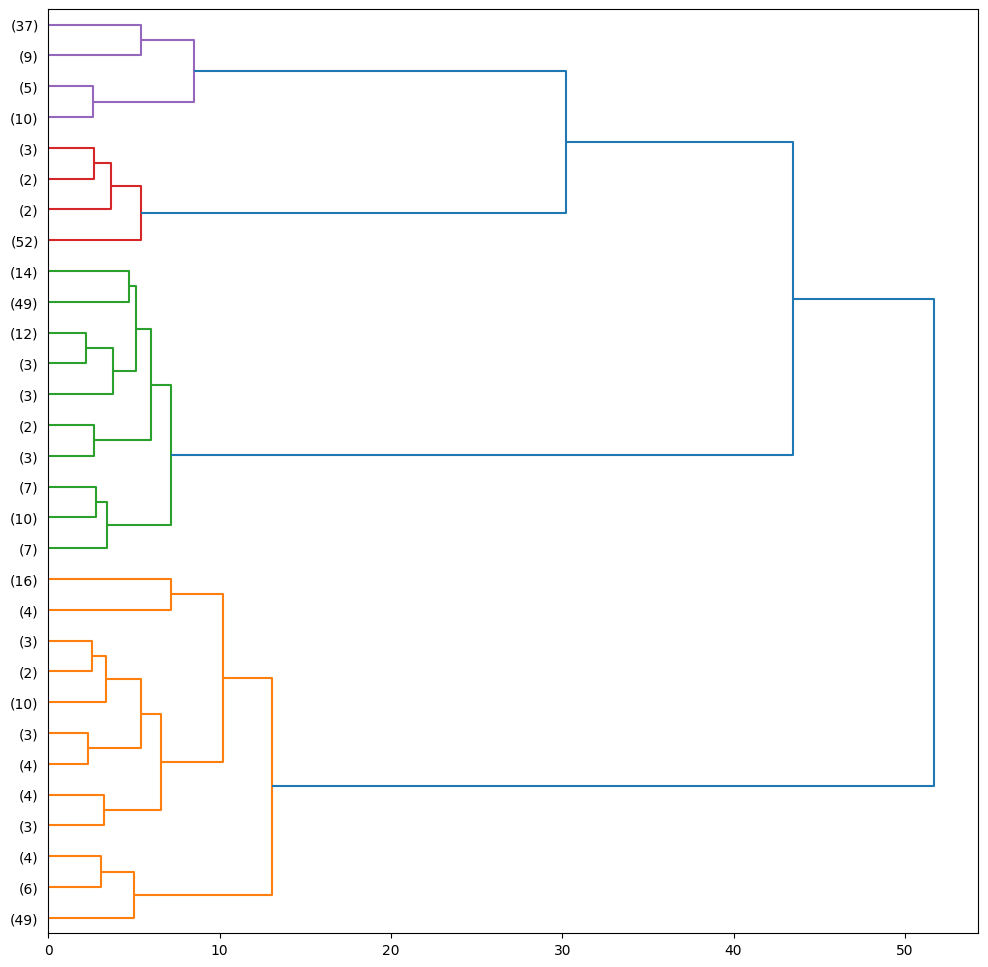

In [86]:
# Посмотрим на отображение дендрограммы с учетом кол-ва наблюдений в каждой ветке дендрограммы
fig = plt.figure(figsize=(12,12))
dend_v2 = dendrogram(link,
                     color_threshold=dist_rev[2],
                     labels=data.index.tolist(),
                     truncate_mode='lastp',
                     orientation='right')

In [87]:
# Посмотрим на количество объектов в каждом кластере
# А также попытаемся проинтерпретировать результаты
data['cluster'] = fcluster(link, dist_rev[3], criterion='distance')
data.groupby('cluster').size()
# data['cluster'].value_counts()

,0
cluster,
1,108
2,110
3,59
4,61


In [88]:
data.groupby('cluster').mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия

Интерпретация:

1) в cluster(1) попали наблюдения, имеющие высокие показатели по пунктам V9, V10, V11

2) в cluster(2) попали наблюдения, имеющие высокие показатели по пунктам V1, V2, V3, V4

3) в cluster(3) попали наблюдения, имеющие высокие показатели по пунктам V7, V8

4) в cluster(4) попали наблюдения, имеющие высокие показатели по пунктам V5, V6

Таким образом, в 1-ую группу входят люди, которые потребляют леденцы при ухудшении физического самочувствия и поялвении боли в горле, заложенности носа и, возможно, других недугах. (108 объектов)

Во 2-ую группу входят люди, потребляющие леденцы для освежения дыхания. (110 объектов)

В 3-ью группу входит респонденты, потребляющие леденцы для концентрации, видимо, при решении важных задач, требущих сосредоточения. (59 объектов)

В 4-ую группу входят респонденты, которые потребляют леденцы как заменители сладкого. (61 объектов)

Так как в 1-ой и 2-ой группе наибольшее количество объектов, то компании следует сосредоточиться на этих двух целевых аудиториях.